# WeatherPy

**Starter Code to Generate Random Geographic Coordinates and a List of Cities**

In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time

from scipy.stats import linregress
from pprint import pprint
from api_keys import weather_api_key
from citipy import citipy

**Generate the Cities List by Using the `citipy` Library**

In [2]:
# Empty list for holding the latitude and longitude combinations
lat_lngs = []

# Empty list for holding the cities names
cities = []

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

# Create a set of random lat and lng combinations
lats = np.random.uniform(lat_range[0], lat_range[1], size=1500)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
print(f"Number of cities in the list: {len(cities)}")

Number of cities in the list: 596


### Requirement 1: Create Plots to Showcase the Relationship Between Weather Variables and Latitude

In [3]:
# Set the API base URL
#https://api.openweathermap.org/data/2.5/weather?q={city name}&appid={API key}
url_base = "http://api.openweathermap.org/data/2.5/weather?q="

# Define an empty list to fetch the weather data for each city
city_data = []

# Print to logger
print("Beginning Data Retrieval     ")
print("-----------------------------")

# Create counters
record_count = 1
set_count = 1

# Loop through all the cities in our list to fetch weather data
for i, city in enumerate(cities):
        
    # Group cities in sets of 50 for logging purposes
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 0

    # Create endpoint URL with each city
    city_url = url_base + city + "&appid=" + weather_api_key
    
    # Log the url, record, and set numbers
    print("Processing Record %s of Set %s | %s" % (record_count, set_count, city))

    # Add 1 to the record count
    record_count += 1

    # Run an API request for each of the cities
    try:
        # Parse the JSON and retrieve data
        city_weather = requests.get(city_url).json()

        # Parse out latitude, longitude, max temp, humidity, cloudiness, wind speed, country, and date
        city_lat = city_weather['coord']['lat']
        city_lng = city_weather['coord']['lon']
        city_max_temp = city_weather['main']['temp_max']
        city_humidity = city_weather['main']['humidity']
        city_clouds = city_weather['clouds']['all']
        city_wind = city_weather['wind']['speed']
        city_country = city_weather['sys']['country']
        city_date = city_weather['dt']

        # Append the City information into city_data list
        city_data.append({"City": city, 
                          "Lat": city_lat, 
                          "Lng": city_lng, 
                          "Max Temp": city_max_temp,
                          "Humidity": city_humidity,
                          "Cloudiness": city_clouds,
                          "Wind Speed": city_wind,
                          "Country": city_country,
                          "Date": city_date})

    # If an error is experienced, skip the city
    except:
        print("City not found. Skipping...")
        pass
              
# Indicate that Data Loading is complete 
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")

Beginning Data Retrieval     
-----------------------------
Processing Record 1 of Set 1 | puerto ayora
Processing Record 2 of Set 1 | freetown
Processing Record 3 of Set 1 | rio grande
Processing Record 4 of Set 1 | port-aux-francais
Processing Record 5 of Set 1 | edinburgh of the seven seas
Processing Record 6 of Set 1 | aioun
Processing Record 7 of Set 1 | east london
Processing Record 8 of Set 1 | blackmans bay
Processing Record 9 of Set 1 | bredasdorp
Processing Record 10 of Set 1 | olonkinbyen
Processing Record 11 of Set 1 | balcarce
Processing Record 12 of Set 1 | bilibino
Processing Record 13 of Set 1 | baud
Processing Record 14 of Set 1 | nova vicosa
Processing Record 15 of Set 1 | puerto natales
Processing Record 16 of Set 1 | kismayo
Processing Record 17 of Set 1 | tralee
Processing Record 18 of Set 1 | college
Processing Record 19 of Set 1 | adamstown
Processing Record 20 of Set 1 | ushuaia
Processing Record 21 of Set 1 | port blair
Processing Record 22 of Set 1 | vila velh

City not found. Skipping...
Processing Record 40 of Set 4 | taltal
Processing Record 41 of Set 4 | buxton
Processing Record 42 of Set 4 | port lincoln
Processing Record 43 of Set 4 | klyuchi
Processing Record 44 of Set 4 | quelimane
Processing Record 45 of Set 4 | hawaiian paradise park
Processing Record 46 of Set 4 | alofi
Processing Record 47 of Set 4 | akureyri
Processing Record 48 of Set 4 | asau
Processing Record 49 of Set 4 | krasnokamensk
Processing Record 0 of Set 5 | bereeda
Processing Record 1 of Set 5 | walvis bay
Processing Record 2 of Set 5 | khandyga
Processing Record 3 of Set 5 | chunskiy
Processing Record 4 of Set 5 | la reforma
Processing Record 5 of Set 5 | aromashevo
Processing Record 6 of Set 5 | zaozersk
Processing Record 7 of Set 5 | cabedelo
Processing Record 8 of Set 5 | qaqortoq
Processing Record 9 of Set 5 | chibougamau
Processing Record 10 of Set 5 | prokhladnyy
Processing Record 11 of Set 5 | orchard homes
Processing Record 12 of Set 5 | tazacorte
Processing

Processing Record 29 of Set 8 | enewetak
Processing Record 30 of Set 8 | briviesca
Processing Record 31 of Set 8 | abashiri
Processing Record 32 of Set 8 | mar del plata
Processing Record 33 of Set 8 | prince george
Processing Record 34 of Set 8 | pisco
Processing Record 35 of Set 8 | naro moru
Processing Record 36 of Set 8 | mirny
Processing Record 37 of Set 8 | argo
Processing Record 38 of Set 8 | talara
Processing Record 39 of Set 8 | san antonio de pale
Processing Record 40 of Set 8 | lagoa
Processing Record 41 of Set 8 | harper
Processing Record 42 of Set 8 | komsomol'skiy
Processing Record 43 of Set 8 | tahe
Processing Record 44 of Set 8 | mount isa
Processing Record 45 of Set 8 | sola
Processing Record 46 of Set 8 | eloy alfaro
Processing Record 47 of Set 8 | songling
Processing Record 48 of Set 8 | villa yapacani
Processing Record 49 of Set 8 | mossel bay
Processing Record 0 of Set 9 | minas de marcona
Processing Record 1 of Set 9 | balykshi
Processing Record 2 of Set 9 | chonc

Processing Record 20 of Set 12 | usinsk
Processing Record 21 of Set 12 | chimbote
Processing Record 22 of Set 12 | bang saphan
Processing Record 23 of Set 12 | lisala
Processing Record 24 of Set 12 | garissa
Processing Record 25 of Set 12 | inhambane
Processing Record 26 of Set 12 | samdari
Processing Record 27 of Set 12 | tionk essil
Processing Record 28 of Set 12 | verkhniy baskunchak
Processing Record 29 of Set 12 | quellon
Processing Record 30 of Set 12 | kangding
Processing Record 31 of Set 12 | borzya
Processing Record 32 of Set 12 | fray luis beltran
Processing Record 33 of Set 12 | moyynkum
Processing Record 34 of Set 12 | kill devil hills
Processing Record 35 of Set 12 | urumqi
Processing Record 36 of Set 12 | kruisfontein
Processing Record 37 of Set 12 | egilsstadir
Processing Record 38 of Set 12 | howard springs
Processing Record 39 of Set 12 | san juan
Processing Record 40 of Set 12 | trevelin
Processing Record 41 of Set 12 | shalqar
Processing Record 42 of Set 12 | marvdas

In [4]:
# Convert the cities weather data into a Pandas DataFrame
city_data_df = pd.DataFrame(city_data)

# Show Record Count
city_data_df.count()

City          567
Lat           567
Lng           567
Max Temp      567
Humidity      567
Cloudiness    567
Wind Speed    567
Country       567
Date          567
dtype: int64

In [5]:
# Display sample data
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,puerto ayora,-0.7393,-90.3518,303.13,89,52,4.47,EC,1689700333
1,freetown,8.4840,-13.2299,299.35,82,100,3.55,SL,1689700334
2,rio grande,-32.0350,-52.0986,286.21,63,64,4.44,BR,1689700334
3,port-aux-francais,-49.3500,70.2167,278.26,84,83,17.62,TF,1689700334
4,edinburgh of the seven seas,-37.0676,-12.3116,287.37,96,100,11.72,SH,1689700334


In [6]:
# Export the City_Data into a csv
city_data_df.to_csv("output_data/cities.csv", index_label="City_ID")

In [7]:
# Read saved data
city_data_df = pd.read_csv("output_data/cities.csv", index_col="City_ID")

# Display sample data
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
0,puerto ayora,-0.7393,-90.3518,303.13,89,52,4.47,EC,1689700333
1,freetown,8.4840,-13.2299,299.35,82,100,3.55,SL,1689700334
2,rio grande,-32.0350,-52.0986,286.21,63,64,4.44,BR,1689700334
3,port-aux-francais,-49.3500,70.2167,278.26,84,83,17.62,TF,1689700334
4,edinburgh of the seven seas,-37.0676,-12.3116,287.37,96,100,11.72,SH,1689700334


In [8]:
# Convert the units on Max Temp from absolute to metric
city_data_df['Max Temp'] = city_data_df['Max Temp'] - 273.15

city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
0,puerto ayora,-0.7393,-90.3518,29.98,89,52,4.47,EC,1689700333
1,freetown,8.4840,-13.2299,26.20,82,100,3.55,SL,1689700334
2,rio grande,-32.0350,-52.0986,13.06,63,64,4.44,BR,1689700334
3,port-aux-francais,-49.3500,70.2167,5.11,84,83,17.62,TF,1689700334
4,edinburgh of the seven seas,-37.0676,-12.3116,14.22,96,100,11.72,SH,1689700334


### Create the Scatter Plots Requested

**Temperature as a function of Latitude**

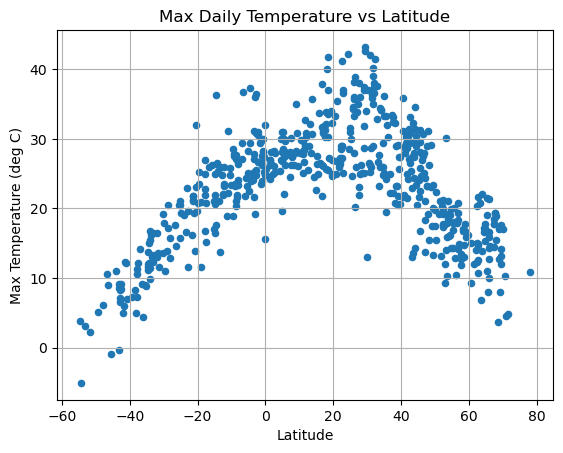

In [12]:
# Build scatter plot for latitude vs. temperature
city_data_df.plot(kind='scatter', x='Lat', y='Max Temp', 
                  title="Max Daily Temperature vs Latitude",
                  ylabel="Max Temperature (deg C)", xlabel="Latitude",
                  grid=True
                 )

# Save the figure
plt.savefig("output_data/Fig1.png")

# Show plot
plt.show()

**Humidity as a function of Latitude**

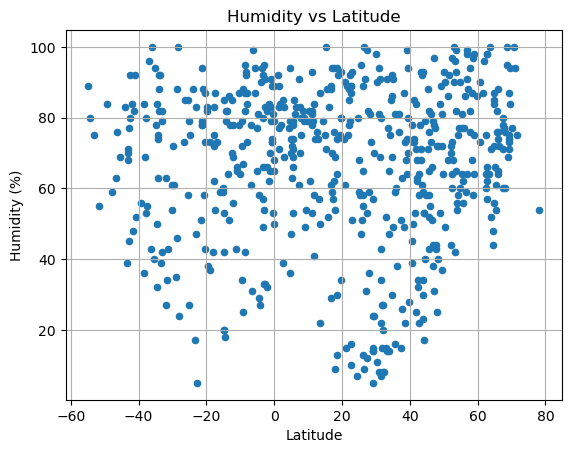

In [11]:
# Build the scatter plots for latitude vs. humidity
city_data_df.plot(kind='scatter', x='Lat', y='Humidity', 
                  title="Humidity vs Latitude",
                  ylabel="Humidity (%)", xlabel="Latitude",
                  grid=True
                 )

# Save the figure
plt.savefig("output_data/Fig2.png")

# Show plot
plt.show()

**Cloud Coverage as a function of Latitude**

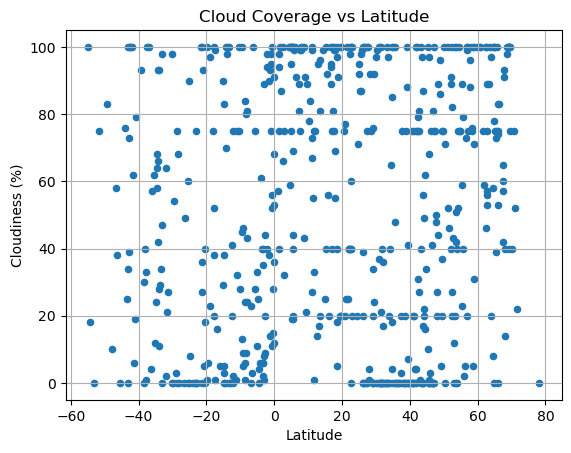

In [13]:
# Build the scatter plots for latitude vs. cloudiness
city_data_df.plot(kind='scatter', x='Lat', y='Cloudiness', 
                  title="Cloud Coverage vs Latitude",
                  ylabel="Cloudiness (%)", xlabel="Latitude",
                  grid=True
                 )

# Save the figure
plt.savefig("output_data/Fig3.png")

# Show plot
plt.show()

**Wind Speed as a function of Latitude**

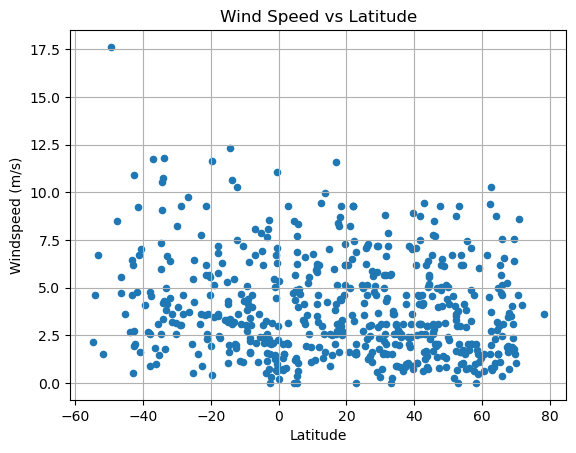

In [14]:
# Build the scatter plots for latitude vs. wind speed
city_data_df.plot(kind='scatter', x='Lat', y='Wind Speed', 
                  title="Wind Speed vs Latitude",
                  ylabel="Windspeed (m/s)", xlabel="Latitude",
                  grid=True
                 )

# Save the figure
plt.savefig("output_data/Fig4.png")

# Show plot
plt.show()

---

## Requirement 2: Compute Linear Regression for Each Relationship


In [107]:
# Define a function to create Linear Regression plots
def linear_regression(x_values, y_values):
    slope, intercept, rvalue, pvalue, stderr = linregress(x_values, y_values)
    df = pd.DataFrame({'x': x_values, 'y': y_values})
    ax = df.plot(kind='scatter', x='x', y='y', color='blue')
    df['regress_values'] = df['x'] * slope + intercept
    df.plot(kind='line', x='x', y='regress_values', color='red', ax=ax, legend=False)
    equation = f'y = {slope:.2f}x + {intercept:.2f}'
    r_value_text = f'r-value: {rvalue:.2f}'
    plt.text(df['x'].min(), df['y'].max(), equation, ha='left', va='top')
    plt.text(df['x'].min(), df['y'].max(), r_value_text, ha='left', va='bottom')

    plt.show()

In [108]:
# Create a DataFrame with the Northern Hemisphere data (Latitude >= 0)
northern_hemi_df = city_data_df.loc[city_data_df["Lat"] >= 0]

# Display sample data
northern_hemi_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
1,freetown,8.4840,-13.2299,26.20,82,100,3.55,SL,1689700334
5,aioun,16.6614,-9.6149,37.93,29,89,2.02,MR,1689700336
9,olonkinbyen,70.9221,-8.7187,4.47,94,52,8.62,SJ,1689700337
11,bilibino,68.0546,166.4372,15.49,76,14,0.71,RU,1689700337
12,baud,20.8333,84.3167,26.88,90,77,1.64,IN,1689700337


In [109]:
# Create a DataFrame with the Southern Hemisphere data (Latitude < 0)
southern_hemi_df = city_data_df.loc[city_data_df["Lat"] <= 0]

# Display sample data
southern_hemi_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
0,puerto ayora,-0.7393,-90.3518,29.98,89,52,4.47,EC,1689700333
2,rio grande,-32.0350,-52.0986,13.06,63,64,4.44,BR,1689700334
3,port-aux-francais,-49.3500,70.2167,5.11,84,83,17.62,TF,1689700334
4,edinburgh of the seven seas,-37.0676,-12.3116,14.22,96,100,11.72,SH,1689700334
6,east london,-33.0153,27.9116,16.52,82,0,4.12,ZA,1689700305


###  Temperature vs. Latitude Linear Regression Plot

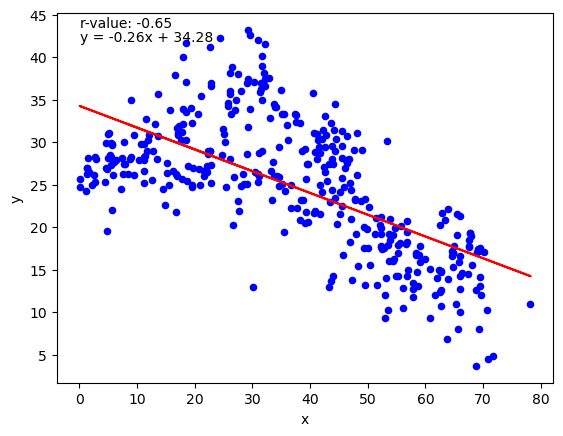

In [110]:
# Linear regression on Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Max Temp"]
linear_regression(x_values, y_values)

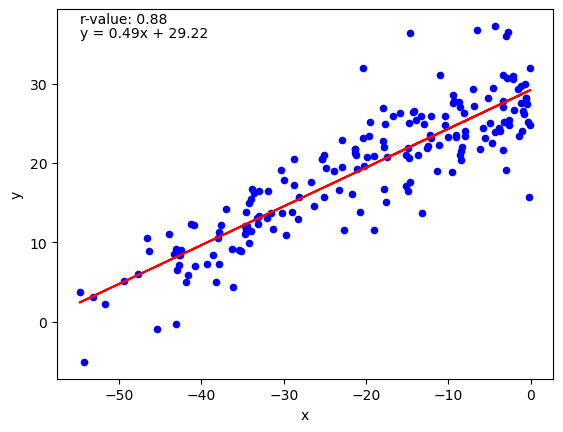

In [111]:
# Linear regression on Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Max Temp"]
linear_regression(x_values, y_values)

**Temperature and Latitude Analysis** <br><br>
For the `Northern Hemisphere` there is a negative correlation between latitude and temperature, with the temperature decreasing as latitude increases.  The correlation is weakened by higher temperatures occuring at cities located between 20 - 30 <sup>o</sup>N than predicted based on the regression.  Further investigation is needed.
<br>
<br>
For the `Southern Hemisphere`, there is a positive correlation between latitude and temperature, with temperatures increasing as latitude increases.  The correlation is stronger than witnessed in the Northern Hemisphere.  Data from the Southern Hemisphere should require further investigation into the Northern Hemisphere dataset.

### Humidity vs. Latitude Linear Regression Plot

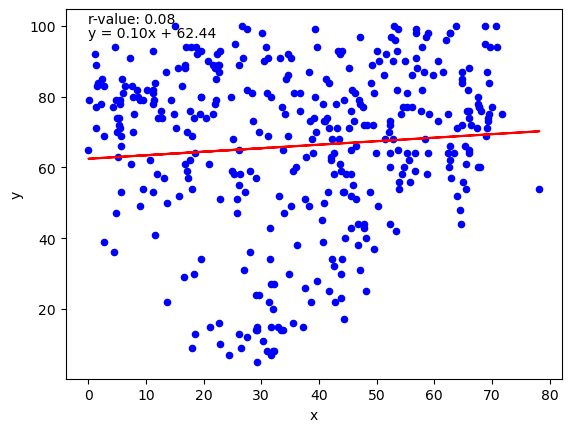

In [112]:
# Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Humidity"]
linear_regression(x_values, y_values)

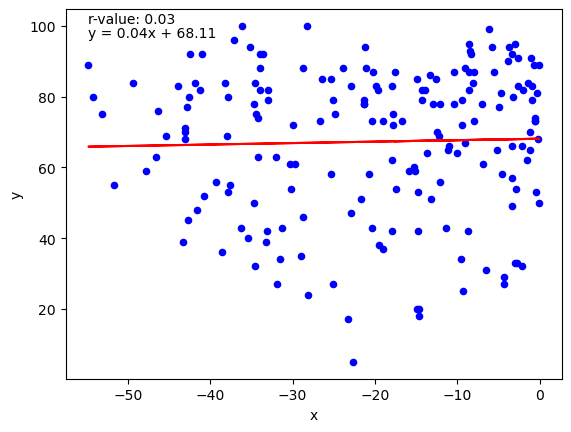

In [113]:
# Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Humidity"]
linear_regression(x_values, y_values)

**Humidity and Latitude Analysis** <br><br>
For the `Northern Hemisphere` and `Southern Hemisphere` there is no correlation between Humidity and Latitude.  Humidity does not appear to be a function of Latitude.


### Cloudiness vs. Latitude Linear Regression Plot

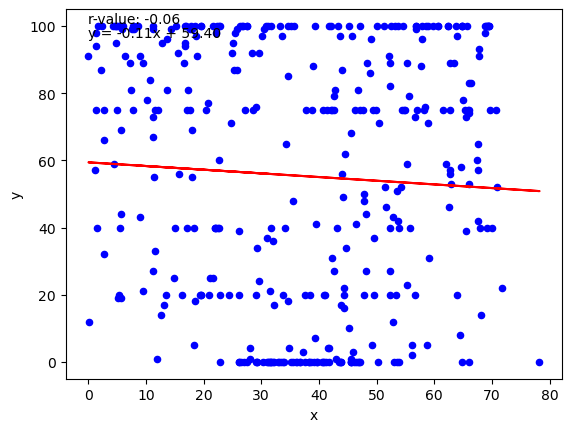

In [114]:
# Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Cloudiness"]
linear_regression(x_values, y_values)

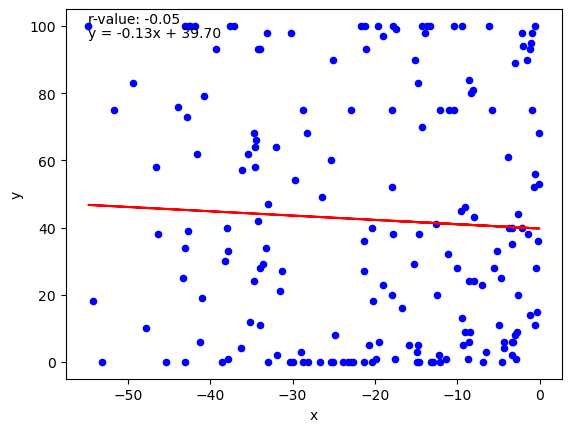

In [115]:
# Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Cloudiness"]
linear_regression(x_values, y_values)

**Cloud Coverage and Latitude Analysis** <br>
For the `Northern Hemisphere` and `Southern Hemisphere` there is no correlation between Cloud Coverage and Latitude. Cloud Coverage does not appear to be a function of Latitude.

### Wind Speed vs. Latitude Linear Regression Plot

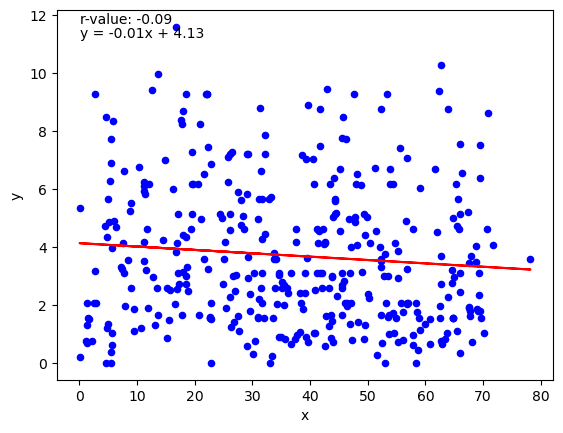

In [116]:
# Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Wind Speed"]
linear_regression(x_values, y_values)

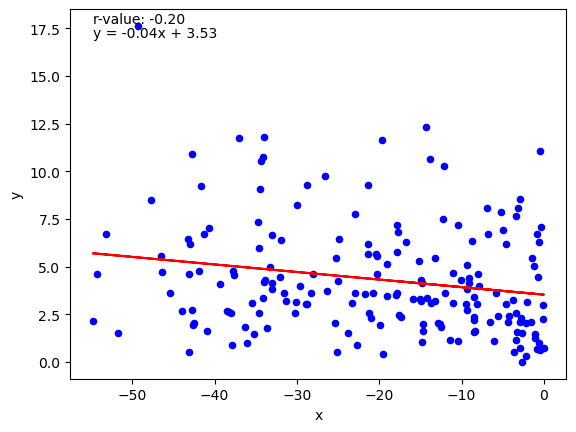

In [117]:
# Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Wind Speed"]
linear_regression(x_values, y_values)

**Cloud Coverage and Latitude Analysis** <br>
For the `Northern Hemisphere` and `Southern Hemisphere` there is no correlation between Wind Speed and Latitude. Wind Speed does not appear to be a function of Latitude.